<a href="https://colab.research.google.com/github/Namsik-Yoon/pytorch_basic/blob/master/7_1_%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%EC%9D%98%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# text 데이터 전처리 실습

In [0]:
!pip install wget
import wget

In [0]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [3]:
wget.download('https://www.dropbox.com/s/vbbnve5znm0bjiq/Joker_script.txt?dl=1')

'Joker_script.txt'

In [137]:
input_file = open('Joker_script.txt','r')
lines = input_file.readlines()
lines[:100]

['JOKER\n',
 '\n',
 '                          AN ORIGIN\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '                         Written by\n',
 '\n',
 '                 Todd Phillips & Scott Silver\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '                                                  13 April 2018 \n',
 '\n',
 '  This story takes place in its own universe. It has no\n',
 '  connection to any of the DC films that have come before it.\n',
 '\n',
 '  We see it as a classic Warner Bros. movie. Gritty, intimate\n',
 '  and oddly funny, the characters live in the real world and\n',
 '  the stakes are personal.\n',
 '\n',
 '  Although it is never mentioned in the film, this story takes\n',
 '  place in the past.\n',
 '\n',
 "  Let's call it 1981.\n",
 '\n',
 "  It's a troubled time. The crime rate in Gotham is at record\n",
 '  highs. A garbage strike has crippled the city for the past\n',
 '  six weeks. And the divide between the "haves" and the "have-\n',
 '  nots" is palpable. Dreams are beyond reach, sl

In [0]:
import re

temp_sentence = ''
raw_sentence = ''

for line in lines:
    line = re.sub('[^a-zA-Z0-9.]',' ',line.lower())
    raw_sentence+=line

In [133]:
splited_sentence = raw_sentence.split('.')
splited_sentence[:20]

['joker                            an origin                              written by                   todd phillips   scott silver                                                       13 april 2018     this story takes place in its own universe',
 ' it has no   connection to any of the dc films that have come before it',
 '    we see it as a classic warner bros',
 ' movie',
 ' gritty  intimate   and oddly funny  the characters live in the real world and   the stakes are personal',
 '    although it is never mentioned in the film  this story takes   place in the past',
 '    let s call it 1981',
 '    it s a troubled time',
 ' the crime rate in gotham is at record   highs',
 ' a garbage strike has crippled the city for the past   six weeks',
 ' and the divide between the  haves  and the  have    nots  is palpable',
 ' dreams are beyond reach  slipping into   delusions',
 '                                                          over black       hear laughter',
 '      the sound of a 

In [0]:
cleansed_splited_sentence = []
for sentence in splited_sentence:
    temp_sentence = ''
    words = sentence.split(' ')
    for word in words:
        if word !='':
            temp_sentence+=word+' '
    if temp_sentence[:-1] == '':continue
    cleansed_splited_sentence.append(temp_sentence[:-1])

In [139]:
cleansed_splited_sentence[:10]

['joker an origin written by todd phillips scott silver 13 april 2018 this story takes place in its own universe',
 'it has no connection to any of the dc films that have come before it',
 'we see it as a classic warner bros',
 'movie',
 'gritty intimate and oddly funny the characters live in the real world and the stakes are personal',
 'although it is never mentioned in the film this story takes place in the past',
 'let s call it 1981',
 'it s a troubled time',
 'the crime rate in gotham is at record highs',
 'a garbage strike has crippled the city for the past six weeks']

In [141]:
splited_word = []
for sentence in cleansed_splited_sentence:
    words = sentence.split(' ')
    splited_word+=words
        
splited_word[:10]

['joker',
 'an',
 'origin',
 'written',
 'by',
 'todd',
 'phillips',
 'scott',
 'silver',
 '13']

[영어 불용어](https://wikidocs.net/22530)

In [142]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import numpy as np

stop_words = set(stopwords.words('english')) 
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [0]:
result = []
for word in splited_word:
    if word not in stop_words:
        result.append(word)

In [144]:
result[:10]

['joker',
 'origin',
 'written',
 'todd',
 'phillips',
 'scott',
 'silver',
 '13',
 'april',
 '2018']

In [145]:
vocab = FreqDist(np.hstack(result))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 2989


In [146]:
vocab['happy']

22

In [147]:
vocab_size = 1000
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 1000


# 네이버 영화 댓글 웹크롤링(조커)

In [0]:
import requests
from bs4 import BeautifulSoup

In [150]:
test_url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=167613&type=after&page=1"
resp = requests.get(test_url)
html = BeautifulSoup(resp.content, 'html.parser')
html


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20200515103320" rel="stylesheet" type="text/css">
<link href="/css/movie_tablet.css?20200515103320" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20200515103320" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20200515103320" type="text/javascript"></script>
</link></head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="167613"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div clas

In [151]:
score_result = html.find('div', {'class': 'score_result'})
lis = score_result.findAll('li')
lis[0]

<li>
<div class="star_score">
<span class="st_off"><span class="st_on" style="width:100.0%"></span></span><em>10</em>
</div>
<div class="score_reple">
<p>
<!-- 스포일러 컨텐츠로 처리되는지 여부 -->
<span id="_filtered_ment_0">
														
															
															
																착하게 사는것은 높은 계단을 오르는것과 같지만 포기하고 내려갈때는 너무나도 빠르고 즐겁다. 
															
														
														
													</span>
</p>
<dl>
<dt>
<em>
<a href="#" onclick="javascript:showPointListByNid(16219865, 'after');parent.clickcr(this, 'ara.uid', '', '', event); return false;" target="_top">
<span>버블껌(roac****)</span>
</a>
</em>
<em>2019.10.02 12:54</em>
</dt>
<dd>
<a class="go_report2" href="#" onclick="parent.clickcr(this, 'ara.report', '', '', event); common.report('false','roac****', 'iiCVFSlTLdR62UUS6c/98OoxQSoOdzFoljx3vFpinBk=', '착하게 사는것은 높은 계단을 오르는것과 같지만 포기하고 내려갈때는 너무나도 빠르고 즐겁다. ', '16219865', 'point_after', false);return false;"><em>신고</em></a>
</dd>
</dl>
</div>
<div class="btn_area">
<a class="_sympathyButton" h

In [163]:
review_text = lis[0].find('p').getText()
review_text.strip()

'착하게 사는것은 높은 계단을 오르는것과 같지만 포기하고 내려갈때는 너무나도 빠르고 즐겁다.'

In [164]:
score = lis[0].find('em').getText()
score

'10'

In [183]:
for lis_ in lis:
    comment = lis_.find('p').getText().strip()
    score = lis_.find('em').getText()
    print(comment,score)


착하게 사는것은 높은 계단을 오르는것과 같지만 포기하고 내려갈때는 너무나도 빠르고 즐겁다. 10
하여간 역대 조커들은 너무 완벽해. 시저 로메로, 잭니콜슨, 로저 스톤버너, 히스레저, 박명수, 호아킨 피닉스.. 10
명작들만 골라서 번역하는 박지훈이야말로 이시대의 조커 아닐까? 10
마블은 10년간 공들여 만든 "타노스"로 관객을 열광시키고 DC는 10년간 똥을 싸도 "조커" 하나로 다시 부활한다. 10
조커 분장 후 계단씬 지린다.. 10
작은 친구의 이마에 입맞춤하던, 그리고 닿을 수 없는 잠금을 풀며 사과하던, 그가 아서였던 마지막 순간. 10
나락에 떨어진 불행한 인간의 손을 아무도 잡아주지 않을 때 그 손을 잡아준건 광기였다 10
봉오동전투에6점을주고 조커에5점을주는 김현수평론가는 누구인가... 8
연기 스토리도 오지는데 장면마다 깔리는 음악들이 압권임 진짜 10
이게 19세가 아니라니 영등위 제정신인가? 마지막에 나도 모르게 조커를 따라 웃고있더라. 정신적으로 엄청 위험한 영화임.그리고 번역오류는 없다 하는데 정작 중요한 편지읽는장면에서 핵심단어를 맘대로 빼놓고 지 맘대로 ... 9


In [286]:
import time
import pandas as pd
score_df = pd.DataFrame(columns=['comment','score'])
score_df

,comment,score


In [287]:
page_num = 1
index = 0
while True:
    url = "https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?code=167613&type=after&page="+f'{page_num}'
    resp = requests.get(url)
    html = BeautifulSoup(resp.content, 'html.parser')
    score_result = html.find('div', {'class': 'score_result'})
    lis = score_result.findAll('li')
    for lis_ in lis:
        comment = lis_.find('p').getText().strip().replace("\n","").replace('\t','').replace('\r','')
        comment = comment.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
        comment = comment.replace("관람객","")
        comment = comment.replace("스포일러가 포함된 감상평입니다.","")
        comment = comment.replace("감상평 보기","")
        score = lis_.find('em').getText()
        if ('관람객' in comment) or ('관람객' in score):continue
        score_df.loc[index] = [comment,score]
        if index%300==0:
            print(f'{index}의 리뷰를 탐색함')
            print(comment,score)
            print('-------------------'*3)
        index+=1
        
    page_num+=1
    if index>30000:break

0의 리뷰를 탐색함
착하게 사는것은 높은 계단을 오르는것과 같지만 포기하고 내려갈때는 너무나도 빠르고 즐겁다. 10
---------------------------------------------------------
300의 리뷰를 탐색함
오늘부터 조커는 호아킨피닉스다 10
---------------------------------------------------------
600의 리뷰를 탐색함
이게 왜 평점이 이렇게 높은지 이해 불가....영화 끝남과 동시에 웅성웅성 나와 같은 사람이 많았음.... 영화보다가 나간 커플도 있음....이해 할 내용이 아예 없음. 결론은 그냥 정신이상자 조커. 돈보다 내 시간... 1
---------------------------------------------------------
900의 리뷰를 탐색함
주인공은웃지만 관객들은 웃을수없었던 영화 10
---------------------------------------------------------
1200의 리뷰를 탐색함
난 왜 이 명작을 영화관에서 보지 않았나2019 제일 후회되는 일이다 10
---------------------------------------------------------
1500의 리뷰를 탐색함
심해로 들어가는 DC를 머리채 잡고 끌어 올렸다 10
---------------------------------------------------------
1800의 리뷰를 탐색함
그니까 새기덜아 애들 괴롭히지 말고 사이좋게 잘지내란 말야 새기덜아 10
---------------------------------------------------------
2100의 리뷰를 탐색함
호아킨 피닉스의 연기가 모든 걸 완성시킨 느낌. 막판 몰입감에, 오랜만에 흠뻑 젖었다. 10
---------------------------------------------------------
2400의 리뷰를 탐색함
사실 영화내에서 가장 악한 인물이 조커인데 관

In [288]:
score_df.head()

,comment,score
0,착하게 사는것은 높은 계단을 오르는것과 같지만 포기하고 내려갈때는 너무나도 빠르고 ...,10
1,"하여간 역대 조커들은 너무 완벽해. 시저 로메로, 잭니콜슨, 로저 스톤버너, 히스레...",10
2,명작들만 골라서 번역하는 박지훈이야말로 이시대의 조커 아닐까?,10
3,"마블은 10년간 공들여 만든 ""타노스""로 관객을 열광시키고 DC는 10년간 똥을 싸...",10
4,조커 분장 후 계단씬 지린다..,10


# 조커 리뷰 전처리

In [0]:
from konlpy.tag import Mecab
import numpy as np
import matplotlib.pyplot as plt

stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
tokenizer = Mecab()

In [290]:
print('전체 샘플의 수 : {}'.format(len(score_df)))

전체 샘플의 수 : 30002


[한글 불용어](https://www.ranks.nl/stopwords/korean)

In [292]:
temp = tokenizer.morphs(score_df.loc[2,'comment'])
print(temp)
temp = [word for word in temp if not word in stopwords]
print(temp)

['명작', '들', '만', '골라서', '번역', '하', '는', '박지훈', '이야말로', '이', '시대', '의', '조커', '아닐까']
['명작', '만', '골라서', '번역', '하', '박지훈', '이야말로', '시대', '조커', '아닐까']


In [0]:
tokenized=[]
for sentence in score_df['comment']:
    temp = []
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)

In [294]:
print(tokenized[:10])

[['착하', '게', '사', '것', '높', '계단', '을', '오르', '것', '같', '지만', '포기', '하', '고', '내려갈', '때', '너무나', '빠르', '고', '즐겁', '다'], ['하여간', '역대', '조커', '너무', '완벽', '해', '시저', '로메로', '잭니콜슨', '로저', '스톤', '버너', '히스레저', '박명수', '호아킨', '피닉스'], ['명작', '만', '골라서', '번역', '하', '박지훈', '이야말로', '시대', '조커', '아닐까'], ['마블', '년', '간', '공들여', '만든', '타노스', '로', '관객', '을', '열광', '시키', '고', '년', '간', '똥', '을', '싸', '조커', '하나', '로', '다시', '부활', '한다'], ['조커', '분장', '후', '계단', '씬', '지', '린다'], ['작', '친구', '이마', '입맞춤', '하', '던', '그리고', '닿', '을', '수', '없', '잠금', '을', '풀', '며', '사과', '하', '던', '그', '아서', '였', '던', '마지막', '순간'], ['나락', '떨어진', '불행', '인간', '손', '을', '아무', '잡', '아', '주', '지', '않', '을', '때', '그', '손', '을', '잡', '아', '준', '건', '광기', '였', '다'], ['봉오동', '전투', '점', '을', '주', '고', '조커', '점', '을', '주', '김현수', '평론가', '누구', '인가'], ['연기', '스토리', '오지', '는데', '장면', '마다', '깔리', '음악', '압권', '임', '진짜'], ['이게', '세', '아니', '라니', '영등', '위', '제정신', '인가', '마지막', '나', '모르', '게', '조커', '따라', '웃', '고', '있', '더라', '정신', '적', '엄청', '위험'

In [295]:
vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 16309


In [296]:
vocab['재밌']

1016

In [297]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 500


In [0]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [0]:
encoded = []
for line in tokenized: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [300]:
print(encoded[:10])

[[0, 10, 381, 19, 213, 139, 7, 0, 19, 25, 23, 0, 5, 4, 0, 64, 285, 0, 4, 0, 2], [0, 200, 6, 30, 91, 72, 0, 0, 0, 0, 0, 0, 115, 0, 29, 50], [145, 35, 0, 0, 5, 0, 0, 349, 6, 0], [257, 224, 499, 0, 190, 0, 20, 331, 7, 0, 0, 4, 224, 499, 0, 7, 0, 6, 106, 20, 163, 0, 160], [6, 481, 236, 139, 181, 12, 0], [360, 476, 0, 0, 5, 47, 156, 0, 7, 16, 14, 0, 7, 0, 127, 0, 5, 47, 21, 51, 43, 47, 167, 247], [0, 0, 0, 161, 0, 7, 477, 0, 57, 58, 12, 40, 7, 64, 21, 0, 7, 0, 57, 367, 134, 110, 43, 2], [0, 0, 99, 7, 58, 4, 6, 99, 7, 58, 0, 0, 211, 254], [9, 75, 0, 36, 102, 387, 0, 123, 0, 135, 38], [197, 208, 59, 0, 0, 415, 0, 254, 167, 15, 120, 10, 6, 0, 78, 4, 11, 400, 140, 17, 479, 204, 3, 135, 156, 0, 0, 14, 2, 5, 36, 0, 0, 0, 0, 102, 27, 0, 0, 0, 0, 4, 12, 0, 0]]


리뷰의 최대 길이 : 164
리뷰의 최소 길이 : 0
리뷰의 평균 길이 : 16.647623


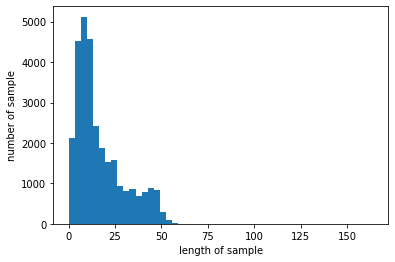

In [301]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [0]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [303]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 164
리뷰의 최소 길이 : 164
리뷰의 평균 길이 : 164.000000


In [304]:
print(encoded[:3])

[[0, 10, 381, 19, 213, 139, 7, 0, 19, 25, 23, 0, 5, 4, 0, 64, 285, 0, 4, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 200, 6, 30, 91, 72, 0, 0, 0, 0, 0, 0, 115, 0, 29, 50, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [0]:
train_df = score_df[:20000]
test_df = score_df[20000:]

train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

In [0]:
from torchtext import data # torchtext.data 임포트
from konlpy.tag import Mecab

# Mecab을 토크나이저로 사용
tokenizer = Mecab()

In [0]:
# 필드 정의
TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Mecab 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   is_target=True)

In [0]:
from torchtext.data import TabularDataset
train_data, test_data = TabularDataset.splits(
    path='.', train='train_data.csv', test='test_data.csv', format='csv',
    fields=[('comment', TEXT), ('score', LABEL)], skip_header=True)

In [343]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 20000
테스트 샘플의 개수 : 10002


In [325]:
print(vars(train_data[0]))

{'comment': ['착하', '게', '사', '는', '것', '은', '높', '은', '계단', '을', '오르', '는', '것', '과', '같', '지만', '포기', '하', '고', '내려갈', '때', '는', '너무나', '도', '빠르', '고', '즐겁', '다'], 'score': '10'}


In [326]:
TEXT.build_vocab(train_data, min_freq=1)
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 12956


In [0]:
TEXT.build_vocab(train_data, min_freq=10, max_size=10000)

In [329]:
print('단어 집합의 크기 : {}'.format(len(TEXT.vocab)))

단어 집합의 크기 : 2402


In [330]:
print(TEXT.vocab.stoi)

defaultdict(<function _default_unk_index at 0x7ffa2c514b70>, {'<unk>': 0, '<pad>': 1, '는': 2, '이': 3, '다': 4, '영화': 5, '가': 6, '의': 7, '고': 8, '조커': 9, '하': 10, '을': 11, '에': 12, '은': 13, '보': 14, '를': 15, '한': 16, '연기': 17, '게': 18, '도': 19, '있': 20, '었': 21, '지': 22, '들': 23, '없': 24, '수': 25, '나': 26, '것': 27, '되': 28, '그': 29, '로': 30, '적': 31, '최고': 32, '호아킨': 33, '에서': 34, '했': 35, '으로': 36, '았': 37, '지만': 38, '같': 39, '사람': 40, '습니다': 41, '음': 42, '과': 43, '할': 44, '어': 45, '너무': 46, '와': 47, '진짜': 48, '않': 49, '였': 50, '생각': 51, '잘': 52, '피닉스': 53, '좋': 54, '던': 55, '는데': 56, '만': 57, '내': 58, '말': 59, '아서': 60, '면': 61, '인': 62, '안': 63, '기': 64, '정말': 65, '봤': 66, '거': 67, '네요': 68, '사회': 69, '때': 70, '싶': 71, '소름': 72, '인생': 73, '주': 74, '아': 75, '듯': 76, '아니': 77, '어요': 78, '연출': 79, '까지': 80, '연기력': 81, '면서': 82, '번': 83, '더': 84, '해': 85, '함': 86, '웃': 87, '그냥': 88, '라는': 89, '에게': 90, '완벽': 91, '미친': 92, '본': 93, '내내': 94, '만들': 95, '겠': 96, '미쳤': 97, '라': 98, '알': 99, '

In [0]:
from torchtext.data import Iterator

In [0]:
batch_size = 5
train_loader = Iterator(dataset=train_data, batch_size = batch_size)
test_loader = Iterator(dataset=test_data, batch_size = batch_size)

In [333]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 4000
테스트 데이터의 미니 배치 수 : 2001


In [348]:
batch = next(iter(train_loader)) # 첫번째 미니배치
print(batch.comment)
print(batch.score)

tensor([[   9,    2,  741,   87,   21,   38,    5,   15,   14,    2,  123,   26,
            2,  369,   16,   83,   19,   87,   22,  725],
        [ 145,    3,    6,    2,  141,   19,  849,  293,  243,  673,    6, 1809,
           55,    5,    1,    1,    1,    1,    1,    1],
        [1566,    0,  639,    0,    3,    4,    1,    1,    1,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1],
        [  14,    8,   26,  101,  839,  684,   76,   16,  192,  195,   16,    5,
           87,   11,   70,  363,  347,   11,  504,   18],
        [  58,   73,  109,   36,  359,   34,   83,   93,    5,    1,    1,    1,
            1,    1,    1,    1,    1,    1,    1,    1]])
tensor([10, 10,  8, 10, 10])


# 한번 분류 모델을 짜보자

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

learning_rate = 0.05
training_epochs = 10

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Sequential(nn.Linear(20, 32),
                                   nn.ReLU(),
                                   nn.Linear(32, 32),
                                   nn.ReLU(),
                                   nn.Linear(32, 11))

    def forward(self, x):
        out = self.layer(x)
        return out

In [0]:
model = Classifier()
criterion = torch.nn.CrossEntropyLoss()    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [384]:
total_batch = len(train_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 4000


In [386]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in train_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(torch.float)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        print(cost)
        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
tensor(0.2001, grad_fn=<NllLossBackward>)
tensor(2.1353, grad_fn=<NllLossBackward>)
tensor(1.6331, grad_fn=<NllLossBackward>)
tensor(1.1467, grad_fn=<NllLossBackward>)
tensor(1.4686, grad_fn=<NllLossBackward>)
tensor(2.4034, grad_fn=<NllLossBackward>)
tensor(1.0847, grad_fn=<NllLossBackward>)
tensor(0.2176, grad_fn=<NllLossBackward>)
tensor(1.2086, grad_fn=<NllLossBackward>)
tensor(0.2215, grad_fn=<NllLossBackward>)
tensor(1.2104, grad_fn=<NllLossBackward>)
tensor(0.2233, grad_fn=<NllLossBackward>)
tensor(1.1730, grad_fn=<NllLossBackward>)
tensor(0.2252, grad_fn=<NllLossBackward>)
tensor(0.2253, grad_fn=<NllLossBackward>)
tensor(1.0529, grad_fn=<NllLossBackward>)
tensor(0.6849, grad_fn=<NllLossBackward>)
tensor(0.7180, grad_fn=<NllLossBackward>)
tensor(0.7180, grad_fn=<NllLossBackward>)
tensor(0.7168, grad_fn=<NllLossBackward>)
tensor(1.4880, grad_fn=<NllLossBackward>)
tensor(0.6921, grad_fn=<NllLossBackward>)
tensor(0.6926, grad_fn=<NllLossBackward>